In [84]:
import numpy as pd
import pandas as pd

In [85]:
data = pd.read_csv("spam.csv", encoding='latin-1')

In [86]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [87]:
data.shape

(5572, 5)

#### Process Involved
1. Data Preprocessing
2. data cleaning
3. EDA
4. Text processing
5. Model building 
6. Evalution 
7. Hypertunning
8. Web convertion
9. Deploy

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [89]:
data.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"], inplace=True)
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [90]:
data.rename({"v1":"Target","v2":"Text"}, axis=1, inplace=True)

In [91]:
# Encoding the categorical values
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

data['Target'] = encode.fit_transform(data['Target'])
data

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [92]:
print(data.isnull().sum())
print("Duplicate Value: " + str(data.duplicated().sum()))

Target    0
Text      0
dtype: int64
Duplicate Value: 403


In [93]:
#  Remove the duplicate value
data.drop_duplicates(inplace=True)

### EDA


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Target  5169 non-null   int32 
 1   Text    5169 non-null   object
dtypes: int32(1), object(1)
memory usage: 101.0+ KB


([<matplotlib.patches.Wedge at 0x1496a9d5280>,
 [Text(-1.0144997251399075, 0.4251944351600247, '0'),
  Text(1.014499764949479, -0.4251943401757036, '1')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

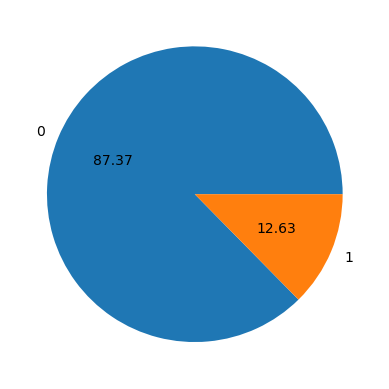

In [95]:
import matplotlib.pyplot as plt
plt.pie(data['Target'].value_counts(),autopct="%0.2f",labels=data["Target"].unique())

`Observation: little imbalance in our data`

### Text preprocessing

In [96]:
import nltk
nltk.download("punkit")  

[nltk_data] Error loading punkit: Package 'punkit' not found in index


False

In [97]:
data['total character'] = data.Text.apply(len)
data

,Target,Text,total character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [98]:
# Total no.of words
data['total words'] = data.Text.apply(lambda x:len(nltk.word_tokenize(x)))
data

,Target,Text,total character,total words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [99]:
# No of sentence
data["total sentence"] = data.Text.apply(lambda x:len(nltk.sent_tokenize(x)))
data

,Target,Text,total character,total words,total sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [ ]:
df.

In [100]:
data[data["Target"]==0].describe()

,Target,total character,total words,total sentence
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [101]:
data[data["Target"]==1].describe()

,Target,total character,total words,total sentence
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


<Axes: xlabel='total character', ylabel='Count'>

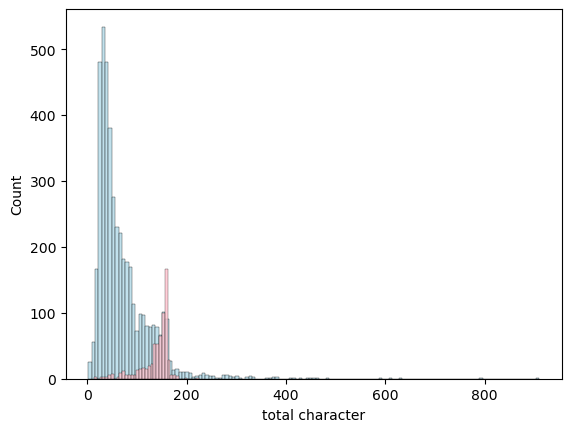

In [102]:
import seaborn as sns
filtered_data1= data.loc[data['Target'] == 1, 'total character']
filtered_data2 = data.loc[data['Target'] == 0, 'total character']

# Plotting the histogram using seaborn
sns.histplot(filtered_data2, color="lightblue")
sns.histplot(filtered_data1, color="pink")

<Axes: xlabel='total words', ylabel='Count'>

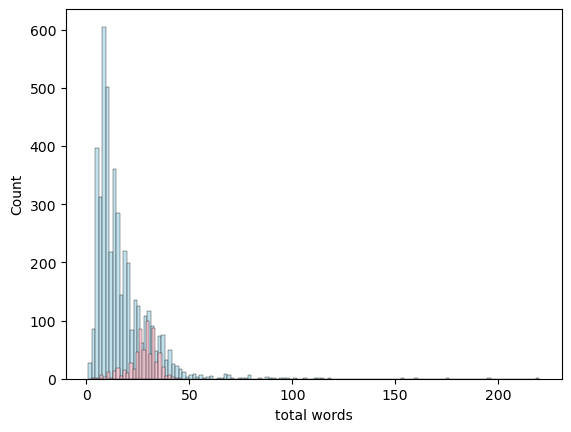

In [103]:
import seaborn as sns
filtered_data1= data.loc[data['Target'] == 1, 'total words']
filtered_data2 = data.loc[data['Target'] == 0, 'total words']

# Plotting the histogram using seaborn
sns.histplot(filtered_data2, color="lightblue")
sns.histplot(filtered_data1, color="pink")

<Axes: xlabel='total sentence', ylabel='Count'>

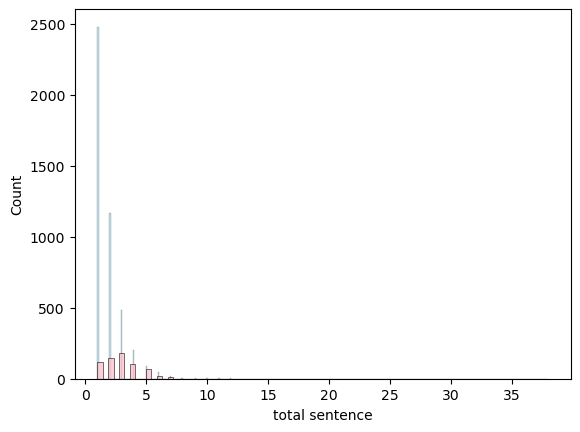

In [104]:
# Total no. of sent
filtered_data1= data.loc[data['Target'] == 1, 'total sentence']
filtered_data2 = data.loc[data['Target'] == 0, 'total sentence']

import seaborn as sns 
sns.histplot(filtered_data2, color="lightblue")
sns.histplot(filtered_data1, color="pink")


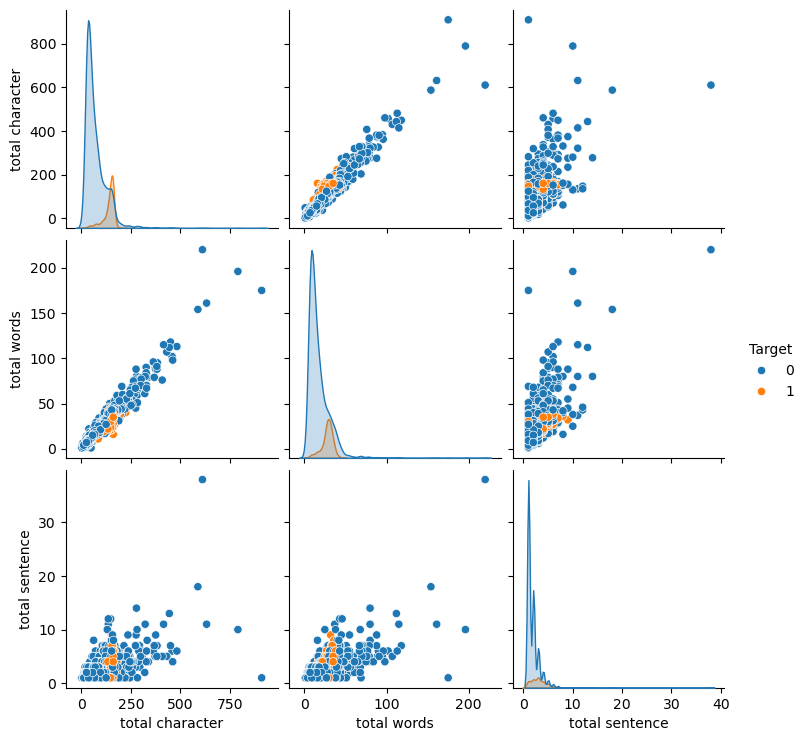

In [106]:
sns.pairplot(data,hue="Target")

There is linearity in my data 

<Axes: >

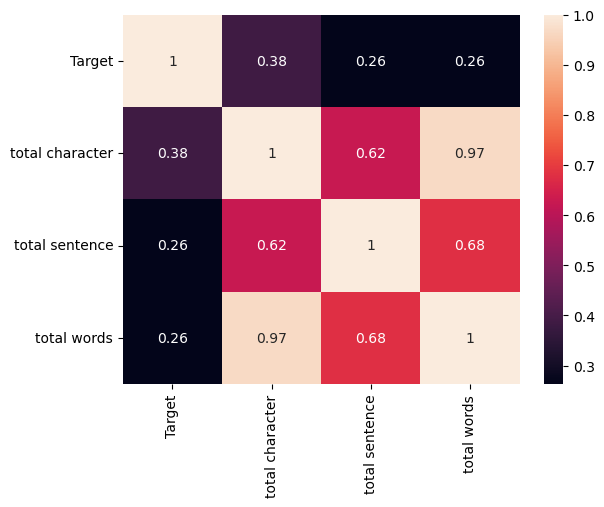

In [123]:
matrix =data[["Target", "total character" , "total sentence", "total words"]].corr()
sns.heatmap(matrix,annot=True)

`obsertion`: As I can see there is Multi-colinearity in data so, i will keep only one feature values --> that one would be `total charater` becouse it has high corelation with target values

### 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming